# CNN Classifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
from sklearn.metrics import classification_report, confusion_matrix
import os

# Setup Directories
PROJECT_ROOT = ".."
DIRS = {
    "data": os.path.join(PROJECT_ROOT, "outputs", "data"),
    "models": os.path.join(PROJECT_ROOT, "outputs", "models"),
    "figures": os.path.join(PROJECT_ROOT, "outputs", "figures"),
    "results": os.path.join(PROJECT_ROOT, "outputs", "results"),
}

# GPU Check
print("Num GPUs Available: ", len(tf.config.list_physical_devices("GPU")))

Num GPUs Available:  0


In [ ]:
# Load Data
X_train = np.load(f"{DIRS['data']}/X_train.npy")
y_train = np.load(f"{DIRS['data']}/y_train.npy")
X_val = np.load(f"{DIRS['data']}/X_val.npy")
y_val = np.load(f"{DIRS['data']}/y_val.npy")
X_test = np.load(f"{DIRS['data']}/X_test.npy")
y_test = np.load(f"{DIRS['data']}/y_test.npy")

# Reshape for CNN: (N, 112, 92, 1)
img_height, img_width = 112, 92
X_train_cnn = X_train.reshape(-1, img_height, img_width, 1)
X_val_cnn = X_val.reshape(-1, img_height, img_width, 1)
X_test_cnn = X_test.reshape(-1, img_height, img_width, 1)

# Convert labels to One-Hot Encoding for multi-class classification
num_classes = len(np.unique(y_train))
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes)
y_val_cat = tf.keras.utils.to_categorical(y_val, num_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes)

print(f"Input Shape: {X_train_cnn.shape}")
print(f"Number of Classes: {num_classes}")

Input Shape: (345, 112, 92, 1)
Number of Classes: 20


In [3]:
def build_cnn_model(input_shape, num_classes):
    model = models.Sequential(
        [
            # Block 1
            layers.Conv2D(
                32, (3, 3), padding="same", activation="relu", input_shape=input_shape
            ),
            layers.MaxPooling2D((2, 2)),
            layers.BatchNormalization(),
            # Block 2
            layers.Conv2D(64, (3, 3), padding="same", activation="relu"),
            layers.MaxPooling2D((2, 2)),
            layers.BatchNormalization(),
            # Block 3
            layers.Conv2D(128, (3, 3), padding="same", activation="relu"),
            layers.MaxPooling2D((2, 2)),
            layers.BatchNormalization(),
            # Flatten & Dense
            layers.Flatten(),
            layers.Dense(256, activation="relu"),
            layers.Dropout(0.5),  # Regularization
            layers.Dense(128, activation="relu"),
            layers.Dropout(0.5),  # Regularization
            # Output Layer
            layers.Dense(num_classes, activation="softmax"),
        ]
    )
    return model


model = build_cnn_model(input_shape=(112, 92, 1), num_classes=num_classes)
model.summary()

c:\Users\Mueen\OneDrive\Desktop\Unsupervised_Final Project\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 112, 92, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 56, 46, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 56, 46, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 56, 46, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 28, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 23, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 23, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 11, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 19712)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     5,046,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │         2,580 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,175,572 (19.74 MB)

 Trainable params: 5,175,124 (19.74 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
# Quick Hyperparameter Tuning Experiments

test_learning_rates = [1e-2, 1e-3, 1e-4]
val_accuracies = []

for lr in test_learning_rates:
    print(f"\nTesting learning rate: {lr}")

    temp_model = build_cnn_model(input_shape=(112, 92, 1), num_classes=num_classes)
    temp_model.compile(
        optimizer=optimizers.Adam(learning_rate=lr),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )

    hist = temp_model.fit(
        X_train_cnn,
        y_train_cat,
        epochs=5,  # small, fast test
        batch_size=32,
        validation_data=(X_val_cnn, y_val_cat),
        verbose=0,
    )

    acc = hist.history["val_accuracy"][-1]
    val_accuracies.append(acc)
    print(f"Validation Accuracy: {acc:.4f}")

print("\nLearning Rate Tuning Results:")
for lr, acc in zip(test_learning_rates, val_accuracies):
    print(f"LR={lr} → Val Acc={acc:.4f}")


Testing learning rate: 0.01
Validation Accuracy: 0.1478

Testing learning rate: 0.001
Validation Accuracy: 0.3217

Testing learning rate: 0.0001
Validation Accuracy: 0.2174

Learning Rate Tuning Results:
LR=0.01 → Val Acc=0.1478
LR=0.001 → Val Acc=0.3217
LR=0.0001 → Val Acc=0.2174


In [5]:
# Hyperparameters
learning_rate = 1e-4 # Tuned lower for stability
batch_size = 32
epochs = 50

model.compile(optimizer=optimizers.Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks for better training
callbacks_list = [
    callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
]

print("Starting Training...")
history = model.fit(
    X_train_cnn, y_train_cat,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val_cnn, y_val_cat),
    callbacks=callbacks_list,
    verbose=1
)

# Save Model
model.save(f"{DIRS['models']}/cnn_classifier.h5")
print("Model saved.")


Starting Training...
Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 17s 721ms/step - accuracy: 0.1594 - loss: 3.5501 - val_accuracy: 0.3130 - val_loss: 2.9353 - learning_rate: 1.0000e-04
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 626ms/step - accuracy: 0.3855 - loss: 2.0257 - val_accuracy: 0.2696 - val_loss: 2.8888 - learning_rate: 1.0000e-04
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 504ms/step - accuracy: 0.4783 - loss: 1.6128 - val_accuracy: 0.2870 - val_loss: 2.8660 - learning_rate: 1.0000e-04
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 585ms/step - accuracy: 0.6377 - loss: 1.1957 - val_accuracy: 0.2000 - val_loss: 2.8473 - learning_rate: 1.0000e-04
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 533ms/step - accuracy: 0.7217 - loss: 0.8779 - val_accuracy: 0.2261 - val_loss: 2.8299 - learning_rate: 1.0000e-04
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 548ms/step - accuracy: 0.7304 - loss: 0.8603 - val_accuracy: 0.2261 - val_loss: 2.8144 - learning_rate: 1.0000e-04
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 4

Model saved.


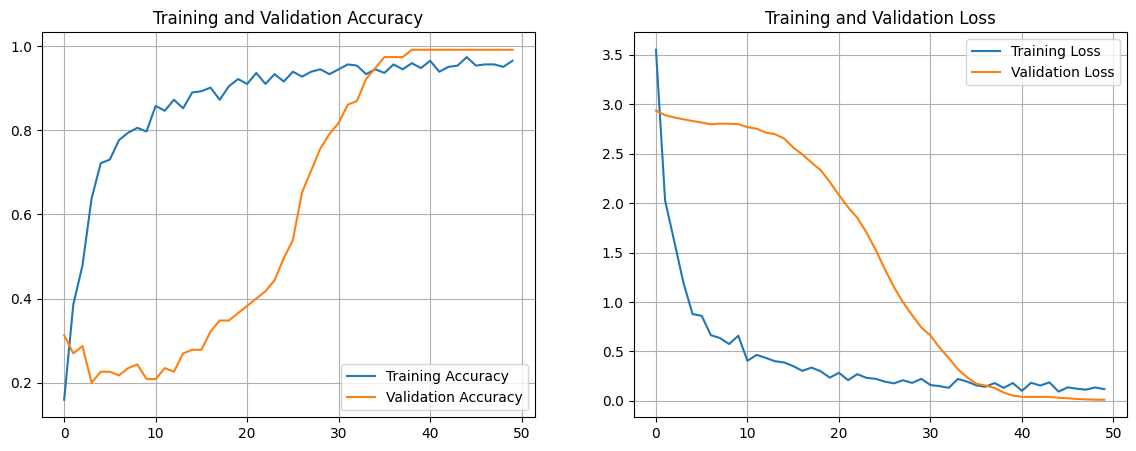

In [6]:
# Plot Training History
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(14, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid(True)

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid(True)

plt.savefig(f"{DIRS['figures']}/05_cnn_training_history.png")
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step


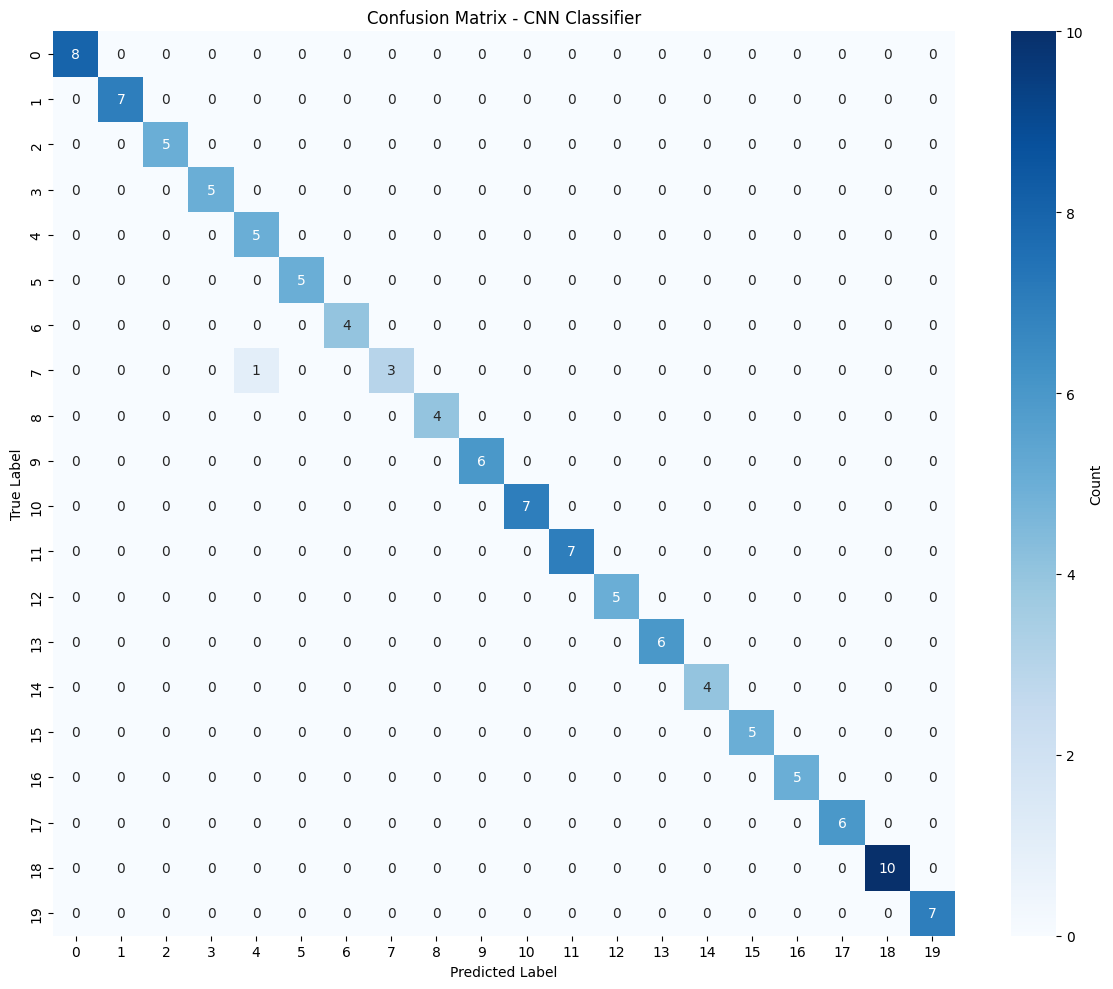

In [8]:
# Predictions
y_pred_probs = model.predict(X_test_cnn)
y_pred = np.argmax(y_pred_probs, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - CNN Classifier')
plt.tight_layout()
plt.savefig(f"{DIRS['figures']}/05_cnn_confusion_matrix.png")
plt.show()


In [9]:
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

# Save Report to CSV
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
report_df.to_csv(f"{DIRS['results']}/05_cnn_classification_report.csv")
print(f"Report saved to {DIRS['results']}/05_cnn_classification_report.csv")


--- Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       0.83      1.00      0.91         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      0.75      0.86         4
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         7
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         5
          16       1.00      1.00      1.00       

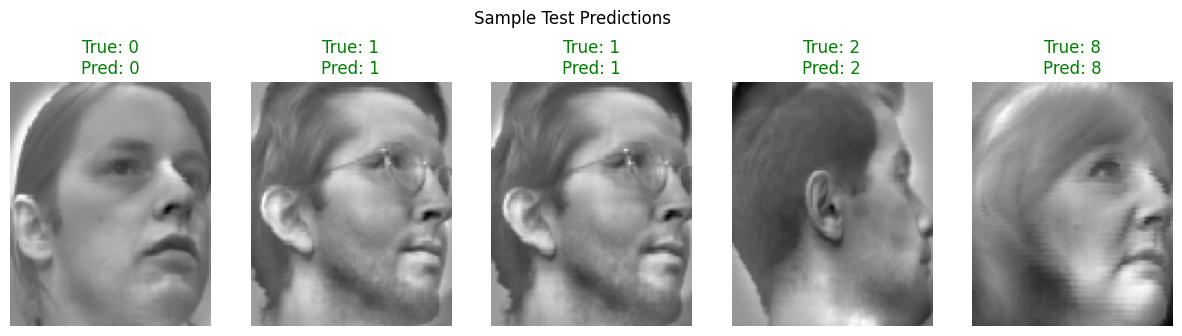

In [10]:
# Select 5 random test images
indices = np.random.choice(len(X_test), 5, replace=False)

plt.figure(figsize=(15, 4))
for i, idx in enumerate(indices):
    plt.subplot(1, 5, i + 1)
    img = X_test_cnn[idx].reshape(112, 92)
    true_lbl = y_test[idx]
    pred_lbl = y_pred[idx]

    # Color code: Green if correct, Red if wrong
    color = "green" if true_lbl == pred_lbl else "red"

    plt.imshow(img, cmap="gray")
    plt.title(f"True: {true_lbl}\nPred: {pred_lbl}", color=color)
    plt.axis("off")

plt.suptitle("Sample Test Predictions")
plt.savefig(f"{DIRS['figures']}/05_cnn_sample_predictions.png")
plt.show()